<a href="https://colab.research.google.com/github/ksuaray/AI-Powered_Data_Exploration/blob/main/LearNNing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Quick Introduction to the Machine Learning Cycle via NBA All-Star Prediction**

In [55]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import plotly.express as px
import numpy as np
from IPython.display import Image   #Display images
import warnings                     #Ignore version warnings
warnings.simplefilter('ignore', FutureWarning)


![](https://drive.google.com/file/d/1Nq2R4qwjAwU90FKZO7wrjsGspENCokDg/view?usp=sharing)


![](https://drive.google.com/uc?export=view&id=1Nq2R4qwjAwU90FKZO7wrjsGspENCokDg)


## **The Machine Learning Cycle - UPAD**

![](https://drive.google.com/uc?export=view&id=1CXopKDzOFofbEG5ovRI3kPK4Ne2Pe42L)


### **UNDERSTAND**

*About bball analytics*

### **PREPARE**

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
def get_nba_stats(year):
    """
    Fetches and merges traditional and advanced NBA player stats for a given year.
    :param year: int, the NBA season year (e.g., 2025)
    :return: Pandas DataFrame containing merged stats
    """
    base_url = "https://www.basketball-reference.com/leagues/NBA_{}_{}.html"

    # Construct URLs for traditional and advanced stats
    trad_url = base_url.format(year, "per_game")
    adv_url = base_url.format(year, "advanced")

    # Function to scrape table data from a given URL
    def scrape_table(url):
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table')
        if table is None:
            return pd.DataFrame()  # Return empty DataFrame if no table found

        table_html = str(table)
        df = pd.read_html(StringIO(table_html))[0]

        # Check if the columns are a MultiIndex before dropping a level
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.droplevel(0)

        df = df[df['Player'] != 'Player']  # Remove repeated header rows
        df = df.loc[:, ~df.columns.duplicated()]  # Remove duplicate column names
        return df

    # Scrape both tables
    trad_stats = scrape_table(trad_url)
    adv_stats = scrape_table(adv_url)

    # Check if 'Tm' column exists in both DataFrames
    if 'Team' not in trad_stats.columns or 'Team' not in adv_stats.columns:
        return pd.DataFrame()  # Return empty DataFrame if essential columns are missing

    # Remove duplicate player column before merging
    adv_stats = adv_stats.drop(columns=['Rk'], errors='ignore')
    trad_stats = trad_stats.drop(columns=['Rk'], errors='ignore')

    # Merge the data on 'Player' and 'Tm' (team)
    merged_df = pd.merge(trad_stats, adv_stats, on=['Player', 'Team'], suffixes=("_trad", "_adv"))
    merged_df['Year'] = year
    # Check if the 'Awards_trad' column exists
    if 'Awards_trad' in merged_df.columns:
        merged_df['All_Star'] = merged_df['Awards_trad'].str.contains('AS', na=False).astype(int)
    #else:
    return merged_df




In [ ]:


# Example usage
year = 2024
nba_stats = get_nba_stats(year)
nba_stats

,Player,Age_trad,Team,Pos_trad,G_trad,GS_trad,MP_trad,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards_trad,Age_adv,Pos_adv,G_adv,GS_adv,MP_adv,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards_adv,Year,All_Star
0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,0.529,1.4,3.6,0.388,10.2,18.3,0.556,0.561,10.2,11.6,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS,29.0,C,39.0,39.0,1309.0,34.1,0.644,0.163,0.531,7.9,28.8,18.1,32.4,1.7,4.6,12.5,39.6,5.2,2.3,7.5,0.275,8.5,3.1,11.6,4.5,AS,2024,1
1,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,0.487,4.1,10.6,0.382,7.4,13.0,0.573,0.573,6.8,8.7,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,"MVP-3,CPOY-6,AS,NBA1",24.0,PG,70.0,70.0,2624.0,28.1,0.617,0.450,0.368,2.5,24.4,13.5,44.3,1.8,1.3,12.8,36.0,8.5,3.5,12.0,0.220,8.3,1.7,9.9,8.0,"MVP-3,CPOY-6,AS,NBA1",2024,1
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,0.611,0.5,1.7,0.274,11.0,17.1,0.645,0.624,7.0,10.7,0.657,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,"MVP-4,DPOY-9,CPOY-12,AS,NBA1",29.0,PF,73.0,73.0,2567.0,29.9,0.649,0.091,0.571,8.6,27.0,17.9,32.7,1.6,2.6,12.7,33.0,9.5,3.7,13.2,0.246,6.7,2.4,9.0,7.2,"MVP-4,DPOY-9,CPOY-12,AS,NBA1",2024,1
3,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,0.535,1.3,3.6,0.353,9.3,16.2,0.576,0.567,7.6,8.7,0.874,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,"MVP-2,DPOY-7,CPOY-3,AS,NBA1",25.0,PG,75.0,75.0,2553.0,29.3,0.636,0.181,0.436,3.0,14.7,9.1,29.8,2.8,2.4,8.4,32.8,10.5,4.2,14.6,0.275,6.7,2.3,9.0,7.1,"MVP-2,DPOY-7,CPOY-3,AS,NBA1",2024,1
4,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,0.479,2.7,6.8,0.401,7.5,14.6,0.516,0.543,5.5,6.5,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,"MVP-5,CPOY-5,AS,NBA2",27.0,PG,77.0,77.0,2726.0,23.4,0.592,0.319,0.302,1.8,9.7,5.7,33.5,1.3,0.4,9.1,32.5,8.8,2.4,11.2,0.198,6.3,-0.4,5.8,5.4,"MVP-5,CPOY-5,AS,NBA2",2024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Ron Harper Jr.,23.0,TOR,PF,1.0,0.0,4.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN,23.0,PF,1.0,0.0,4.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,28.6,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.087,-11.7,2.8,-8.8,0.0,NaN,2024,0
732,Justin Jackson,28.0,MIN,SF,2.0,0.0,0.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,28.0,SF,2.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.031,-6.3,-1.2,-7.5,0.0,NaN,2024,0
733,Dmytro Skapintsev,25.0,NYK,C,2.0,0.0,1.0,0.0,0.5,0.000,0.0,0.0,NaN,0.0,0.5,0.000,0.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,25.0,C,2.0,0.0,2.0,-19.3,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.6,0.0,0.0,0.0,-0.483,-16.0,-9.8,-25.9,0.0,NaN,2024,0
734,Javonte Smart,24.0,PHI,PG,1.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,24.0,PG,1.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.005,-6.2,-2.1,-8.3,0.0,NaN,2024,0


In [ ]:
# prompt: Excellent. Now the get_nba_stats function is doing what I want it to do! Now i need a new function that takes as input a list of years, and output is a dataframe that joins the get_nba_stats dataframes from each of the given years, to create longer dataframes

import pandas as pd
def combine_nba_stats(years):
    """
    Combines NBA stats dataframes for multiple years.

    Args:
        years: A list of years (integers) for which to fetch and combine data.

    Returns:
        A pandas DataFrame containing the combined stats for all specified years,
        or an empty DataFrame if any errors occur during data retrieval.
    """
    all_stats = []
    for year in years:
        try:
            year_stats = get_nba_stats(year)
            if not year_stats.empty:  # Only append non-empty DataFrames
                all_stats.append(year_stats)
        except Exception as e:
            print(f"Error retrieving data for year {year}: {e}")
            # Handle the exception appropriately, e.g., continue to the next year
            continue

    if all_stats:
      return pd.concat(all_stats, ignore_index=True)
    else:
      return pd.DataFrame() # Return an empty DataFrame if no valid data was retrieved




In [ ]:
# Example Usage
years_to_combine = [1980,1990,2000,2010,2020]
combined_df = combine_nba_stats(years_to_combine)
combined_df

,Player,Age_trad,Team,Pos_trad,G_trad,GS_trad,MP_trad,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards_trad,Age_adv,Pos_adv,G_adv,GS_adv,MP_adv,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards_adv,Year,All_Star
0,George Gervin,27.0,SAS,SG,78.0,NaN,37.6,13.1,24.9,0.528,0.4,1.3,0.314,12.7,23.6,0.540,0.536,6.5,7.6,0.852,2.0,3.2,5.2,2.6,1.4,1.0,3.3,2.7,33.1,"MVP-3,AS,NBA1",27.0,SG,78.0,NaN,2934.0,24.0,0.587,0.053,0.306,5.7,8.9,7.3,11.0,1.6,1.4,10.3,31.7,9.3,1.3,10.6,0.173,5.5,-1.6,3.9,4.4,"MVP-3,AS,NBA1",1980,1
1,World B. Free,26.0,SDC,SG,68.0,NaN,38.0,10.8,22.9,0.474,0.1,0.4,0.360,10.7,22.5,0.476,0.477,8.4,11.2,0.753,1.9,1.6,3.5,4.2,1.2,0.5,3.4,2.9,30.2,AS,26.0,SG,68.0,NaN,2585.0,22.7,0.544,0.016,0.488,5.2,4.7,5.0,18.0,1.5,0.7,10.8,32.7,7.7,0.3,8.0,0.148,4.9,-1.9,3.1,3.3,AS,1980,1
2,Adrian Dantley,24.0,UTA,SF,68.0,NaN,39.3,10.7,18.6,0.576,0.0,0.0,0.000,10.7,18.6,0.577,0.576,6.5,7.7,0.842,2.7,4.9,7.6,2.8,1.4,0.2,3.4,3.1,28.0,AS,24.0,SF,68.0,NaN,2674.0,24.3,0.635,0.002,0.415,8.3,14.0,11.3,12.3,1.8,0.3,13.5,27.8,9.5,1.1,10.5,0.189,5.3,-1.6,3.7,3.8,AS,1980,1
3,Julius Erving,29.0,PHI,SF,78.0,78.0,36.1,10.7,20.7,0.519,0.1,0.3,0.200,10.7,20.4,0.523,0.520,5.4,6.8,0.787,2.8,4.6,7.4,4.6,2.2,1.8,3.6,2.7,26.9,"MVP-2,AS,NBA1",29.0,SF,78.0,78.0,2812.0,25.4,0.568,0.012,0.331,8.6,12.9,10.9,21.4,2.8,2.7,13.3,30.3,7.3,5.2,12.5,0.213,5.7,1.9,7.6,6.8,"MVP-2,AS,NBA1",1980,1
4,Moses Malone,24.0,HOU,C,82.0,82.0,38.3,9.5,18.9,0.502,0.0,0.1,0.000,9.5,18.8,0.504,0.502,6.9,9.5,0.719,7.0,7.5,14.5,1.8,1.0,1.3,3.7,2.6,25.8,"MVP-9,AS,NBA2",24.0,C,82.0,82.0,3140.0,24.1,0.560,0.004,0.505,19.6,22.3,20.9,7.1,1.2,1.9,13.7,27.6,8.9,3.0,11.9,0.183,4.5,-2.4,2.1,3.2,"MVP-9,AS,NBA2",1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,William Howard,26.0,HOU,PF,2.0,0.0,6.5,0.0,2.0,0.000,0.0,2.0,0.000,0.0,0.0,NaN,0.000,0.0,0.0,NaN,0.0,1.0,1.0,0.5,0.0,0.0,0.5,0.5,0.0,NaN,26.0,PF,2.0,0.0,13.0,-12.7,0.000,1.000,0.000,0.0,16.3,8.1,9.1,0.0,0.0,20.0,15.9,-0.1,0.0,-0.1,-0.357,-14.2,-5.4,-19.6,-0.1,NaN,2020,0
2542,Stanton Kidd,27.0,UTA,SG,4.0,0.0,3.8,0.0,0.8,0.000,0.0,0.3,0.000,0.0,0.5,0.000,0.000,0.0,0.0,NaN,0.0,0.8,0.8,0.3,0.0,0.0,0.5,0.8,0.0,NaN,27.0,SG,4.0,0.0,15.0,-13.7,0.000,0.333,0.000,0.0,21.3,11.0,8.0,0.0,0.0,40.0,14.6,-0.1,0.0,-0.1,-0.327,-16.2,-1.4,-17.6,-0.1,NaN,2020,0
2543,J.P. Macura,24.0,CLE,SG,1.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,24.0,SG,1.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.022,-5.2,-1.2,-6.4,0.0,NaN,2020,0
2544,Isaiah Roby,21.0,OKC,PF,3.0,0.0,3.7,0.0,0.3,0.000,0.0,0.0,NaN,0.0,0.3,0.000,0.000,0.0,0.0,NaN,0.0,0.7,0.7,0.0,0.0,0.0,0.3,0.3,0.0,NaN,21.0,PF,3.0,0.0,11.0,-7.7,0.000,0.000,0.000,0.0,19.5,10.0,0.0,0.0,0.0,50.0,8.0,-0.1,0.0,0.0,-0.188,-12.0,-3.4,-15.4,0.0,NaN,2020,0


In [ ]:
combined_df.dropna(axis=0)

,Player,Age_trad,Team,Pos_trad,G_trad,GS_trad,MP_trad,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards_trad,Age_adv,Pos_adv,G_adv,GS_adv,MP_adv,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards_adv,Year,All_Star
3,Julius Erving,29.0,PHI,SF,78.0,78.0,36.1,10.7,20.7,0.519,0.1,0.3,0.200,10.7,20.4,0.523,0.520,5.4,6.8,0.787,2.8,4.6,7.4,4.6,2.2,1.8,3.6,2.7,26.9,"MVP-2,AS,NBA1",29.0,SF,78.0,78.0,2812.0,25.4,0.568,0.012,0.331,8.6,12.9,10.9,21.4,2.8,2.7,13.3,30.3,7.3,5.2,12.5,0.213,5.7,1.9,7.6,6.8,"MVP-2,AS,NBA1",1980,1
4,Moses Malone,24.0,HOU,C,82.0,82.0,38.3,9.5,18.9,0.502,0.0,0.1,0.000,9.5,18.8,0.504,0.502,6.9,9.5,0.719,7.0,7.5,14.5,1.8,1.0,1.3,3.7,2.6,25.8,"MVP-9,AS,NBA2",24.0,C,82.0,82.0,3140.0,24.1,0.560,0.004,0.505,19.6,22.3,20.9,7.1,1.2,1.9,13.7,27.6,8.9,3.0,11.9,0.183,4.5,-2.4,2.1,3.2,"MVP-9,AS,NBA2",1980,1
10,Gus Williams,26.0,SEA,PG,82.0,82.0,36.2,9.0,18.7,0.482,0.1,0.4,0.194,8.9,18.3,0.489,0.484,4.0,5.1,0.788,1.5,1.8,3.4,4.8,2.4,0.5,2.2,2.0,22.1,"MVP-8,NBA2",26.0,PG,82.0,82.0,2969.0,20.6,0.529,0.023,0.274,4.5,5.3,4.9,20.7,3.2,0.7,9.5,25.2,7.2,4.4,11.6,0.187,3.1,1.6,4.7,5.0,"MVP-8,NBA2",1980,0
11,Paul Westphal,29.0,PHO,SG,82.0,82.0,32.5,8.4,16.1,0.525,0.3,1.1,0.280,8.1,14.9,0.544,0.535,4.7,5.4,0.862,0.6,1.7,2.3,5.1,1.5,0.4,2.5,2.0,21.9,"AS,NBA1",29.0,SG,82.0,82.0,2665.0,21.1,0.593,0.071,0.336,1.9,5.7,3.9,24.2,2.0,0.7,12.0,25.6,7.7,2.8,10.5,0.189,4.0,0.0,3.9,4.0,"AS,NBA1",1980,1
16,Larry Bird,23.0,BOS,PF,82.0,82.0,36.0,8.5,17.8,0.474,0.7,1.7,0.406,7.7,16.1,0.481,0.494,3.7,4.4,0.836,2.6,7.8,10.4,4.5,1.7,0.6,3.2,3.4,21.3,"MVP-4,ROY-1,AS,NBA1",23.0,PF,82.0,82.0,2955.0,20.5,0.538,0.098,0.246,8.3,23.6,16.0,18.5,2.3,1.0,14.0,25.3,5.6,5.6,11.2,0.182,3.0,1.5,4.5,4.8,"MVP-4,ROY-1,AS,NBA1",1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,Jarrett Allen,21.0,BRK,C,70.0,64.0,26.5,4.3,6.6,0.649,0.0,0.1,0.000,4.3,6.6,0.658,0.649,2.4,3.9,0.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1,DPOY-12,21.0,C,70.0,64.0,1852.0,20.7,0.664,0.013,0.581,12.3,24.9,18.7,8.9,1.0,4.2,11.7,14.9,5.2,2.9,8.2,0.212,1.4,1.0,2.3,2.0,DPOY-12,2020,0
2119,George Hill,33.0,MIL,PG,59.0,2.0,21.5,3.3,6.4,0.516,1.4,3.0,0.460,1.9,3.4,0.565,0.624,1.4,1.7,0.842,0.8,2.2,3.0,3.1,0.8,0.1,1.0,1.4,9.4,6MOY-4,33.0,PG,59.0,2.0,1271.0,16.9,0.659,0.468,0.269,4.1,9.3,6.9,19.0,1.7,0.3,11.9,15.5,3.5,2.1,5.5,0.210,1.6,1.3,2.9,1.6,6MOY-4,2020,0
2175,Patrick Beverley,31.0,LAC,PG,51.0,50.0,26.3,2.9,6.7,0.431,1.6,4.0,0.388,1.3,2.6,0.496,0.548,0.6,0.9,0.660,1.1,4.1,5.2,3.6,1.1,0.5,1.3,3.1,7.9,DPOY-6,31.0,PG,51.0,50.0,1342.0,12.5,0.560,0.604,0.138,4.5,15.8,10.3,18.2,1.9,1.6,15.4,13.3,1.6,2.0,3.6,0.128,-0.3,2.5,2.2,1.4,DPOY-6,2020,0
2182,Terence Davis,22.0,TOR,SG,72.0,4.0,16.8,2.8,6.1,0.456,1.3,3.4,0.388,1.5,2.7,0.541,0.564,0.7,0.8,0.864,0.7,2.6,3.3,1.6,0.5,0.2,1.1,1.7,7.5,ROY-6,22.0,SG,72.0,4.0,1209.0,13.8,0.588,0.555,0.135,4.5,16.0,10.3,14.2,1.5,1.1,14.1,19.0,1.2,1.9,3.1,0.122,0.1,0.7,0.8,0.8,ROY-6,2020,0


In [ ]:
import pandas as pd
def combine_nba_stats_ML(years):
    """
    Combines NBA stats dataframes for multiple years.

    Args:
        years: A list of years (integers) for which to fetch and combine data.

    Returns:
        A pandas DataFrame containing the combined stats for all specified years,
        or an empty DataFrame if any errors occur during data retrieval.
    """
    all_stats = []
    for year in years:
        try:
            year_stats = get_nba_stats(year).drop(['Player','Team','Awards_trad','Awards_adv','Age_adv','Pos_adv','G_adv','GS_adv'],axis=1)
            if not year_stats.empty:  # Only append non-empty DataFrames
                all_stats.append(year_stats)
        except Exception as e:
            print(f"Error retrieving data for year {year}: {e}")
            # Handle the exception appropriately, e.g., continue to the next year
            continue

    cnsm = pd.concat(all_stats, ignore_index=True).dropna()
    if all_stats:
      return cnsm[(cnsm['G_trad']>30) & (cnsm['MP_trad']>24)]
    else:
      return pd.DataFrame() # Return an empty DataFrame if no valid data was retrieved

We know that a learning algorithm is only useful to the extent that we can confidently apply it to unseen data to make accurate predictions. We want to train machines to learn, not to memorize. The ability to generalize is measured by an investigation of model performance on a random sample of the full data called the test set. Before we explore or analyze our data it is imperative that we split it into a training, validation and test set. This step will introduce us to Python's machine learning powerhouse, **[scikit learn](https://scikit-learn.org/stable/index.html)**.

In [ ]:
# prompt: create a list of the odd number years from 2001 to 2023

import random

rms = 4
random.seed(rms)
# Generate a list of even years between 2000 and 2024
years = list(range(2000, 2024, 1))

# Calculate the split point for 80/20 split
split_point = int(0.8 * len(years))

# Create years_train (80% of even years)
years_train = random.sample(years, split_point)

# Create years_val (half of remaining 20% of even years)
years_remaining = list(set(years) - set(years_train))

years_val = random.sample(years_remaining, int(len(years_remaining)*.6))

# Create years_test (remaining 20% of even years)
years_test = list(set(years_remaining) - set(years_val))
years_test.append(2024)

print("Training:", years_train)
print("Validation:", years_val)
print("Testing:", years_test)

Training: [2007, 2009, 2003, 2012, 2015, 2004, 2002, 2017, 2000, 2006, 2008, 2018, 2019, 2021, 2013, 2022, 2005, 2016, 2001]
Validation: [2020, 2010, 2014]
Testing: [2011, 2023, 2024]


In [ ]:
# Example Usage
Training = combine_nba_stats_ML(years_train)
Training

,Age_trad,Pos_trad,G_trad,GS_trad,MP_trad,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MP_adv,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,All_Star
0,28.0,SG,77.0,77.0,40.8,10.6,22.8,0.463,1.8,5.2,0.344,8.8,17.6,0.497,0.502,8.7,10.0,0.868,1.0,4.7,5.7,5.4,1.4,0.5,3.3,2.7,31.6,3140.0,26.1,0.580,0.227,0.437,2.8,13.5,8.2,25.5,1.8,0.9,10.9,33.6,10.8,2.2,13.0,0.199,6.4,-0.5,5.9,6.1,2007,1
1,22.0,SF,65.0,65.0,38.2,10.6,22.4,0.476,0.6,2.3,0.268,10.0,20.1,0.499,0.489,7.1,8.7,0.808,2.2,3.8,6.0,3.8,1.2,0.4,3.6,3.1,28.9,2486.0,22.1,0.552,0.103,0.391,6.6,11.1,8.9,19.2,1.5,0.7,12.1,33.4,5.2,2.1,7.3,0.140,3.2,-1.3,1.9,2.5,2007,1
2,25.0,PG,74.0,73.0,39.8,8.7,20.9,0.418,2.8,7.9,0.351,6.0,13.0,0.459,0.484,8.2,9.7,0.844,0.8,3.7,4.6,6.0,1.9,0.2,3.2,3.4,28.4,2942.0,24.0,0.565,0.377,0.464,2.3,11.1,6.6,27.2,2.4,0.3,11.2,31.4,9.3,1.5,10.8,0.177,5.5,-0.8,4.7,5.0,2007,1
3,25.0,SG,51.0,50.0,37.9,9.3,18.9,0.491,0.4,1.5,0.266,8.8,17.3,0.511,0.502,8.5,10.5,0.807,1.0,3.7,4.7,7.5,2.1,1.2,4.2,2.3,27.4,1931.0,28.9,0.583,0.082,0.556,3.2,11.2,7.3,40.5,3.0,2.5,15.3,34.7,5.9,2.9,8.8,0.219,6.3,1.8,8.2,4.9,2007,1
4,22.0,SF,78.0,78.0,40.9,9.9,20.8,0.476,1.3,4.0,0.319,8.6,16.8,0.513,0.507,6.3,9.0,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,3190.0,24.5,0.552,0.191,0.432,3.0,16.6,9.6,29.1,2.1,1.3,11.5,31.0,8.0,5.7,13.7,0.206,5.9,2.2,8.1,8.1,2007,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,26.0,PG,48.0,41.0,27.2,2.6,6.8,0.379,0.8,2.2,0.381,1.8,4.6,0.378,0.440,0.3,0.4,0.737,0.3,1.2,1.4,3.9,0.7,0.1,1.4,2.1,6.3,1305.0,7.9,0.450,0.321,0.058,1.1,5.4,3.1,24.0,1.3,0.2,16.9,14.4,-0.3,-0.1,-0.4,-0.015,-2.9,-2.1,-4.9,-1.0,2001,0
11068,35.0,SG,53.0,19.0,24.6,1.6,4.9,0.336,1.1,3.4,0.315,0.6,1.5,0.385,0.446,0.7,0.8,0.818,0.4,2.8,3.1,1.7,1.0,0.3,0.7,1.8,5.0,1306.0,9.4,0.480,0.699,0.170,1.8,13.3,7.6,11.0,2.2,0.9,11.2,11.6,0.5,2.1,2.6,0.097,-1.9,2.3,0.4,0.8,2001,0
11086,33.0,PG,77.0,5.0,24.1,1.8,4.4,0.403,0.4,1.4,0.302,1.3,3.0,0.450,0.451,0.8,0.9,0.845,0.3,2.3,2.6,4.6,0.8,0.2,2.0,3.1,4.7,1859.0,9.0,0.494,0.316,0.212,1.5,11.2,6.4,29.8,1.7,0.6,29.9,13.3,-0.2,2.3,2.2,0.057,-3.4,0.8,-2.6,-0.3,2001,0
11087,33.0,PG,51.0,5.0,25.7,1.8,4.4,0.419,0.4,1.3,0.313,1.4,3.1,0.462,0.464,0.8,0.9,0.848,0.3,2.4,2.7,4.6,0.7,0.1,1.9,3.1,4.8,1309.0,9.1,0.506,0.288,0.207,1.3,11.1,6.4,29.0,1.6,0.4,28.8,12.7,0.1,1.8,2.0,0.073,-3.1,1.2,-1.9,0.0,2001,0


In [ ]:
Validation = combine_nba_stats_ML(years_val)
Testing = combine_nba_stats_ML(years_test)


In [ ]:
fig = px.box(Training, x="PER", y="All_Star", color="All_Star", boxmode="overlay")
fig.update_layout(boxmode='group')  # To group the box plots by category
fig.update_traces(orientation='h') # horizontal box plots

fig.show()

In [ ]:
pd.value_counts(Training['All_Star'])

<ipython-input-14-e04603b7a0b9>:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



,count
All_Star,
0,2824
1,475


In [ ]:
Training_copy = Training.copy()
X_Train = Training_copy.drop(['All_Star'],axis=1)
y_Train = Training['All_Star']
Validation_copy = Validation.copy()
X_Val = Validation_copy.drop(['All_Star'],axis=1)
y_Val = Validation['All_Star']
Testing_copy = Testing.copy()
X_Test = Testing_copy.drop(['All_Star'],axis=1)
y_Test = Testing['All_Star']

### **ANALYZE**

In [ ]:
#Classes for transforming quantitative and qualitative variables, respectively in the Preprocessing module
from sklearn.preprocessing import StandardScaler,OneHotEncoder

#Module for create new transformed columns, needed for newly created indicators
from sklearn.compose import ColumnTransformer

In [ ]:
#Identify categorical columns based on type, then create a list of (lists of categories for each column)
categorical_columns=list(X_Train.select_dtypes('object').columns)
all_categories = [X_Train[col].unique().tolist() for col in categorical_columns]

In [ ]:
#First identify and create a list of column names for each variable type in our training feature set
numeric_columns=list(X_Train.select_dtypes('float64').columns)

In [ ]:
#Create a function that inputs our feature set and transforms variables (standardizes numerical, and one hot encodes categorical) based on variable type
preprocessor=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat',OneHotEncoder(categories = all_categories),categorical_columns),
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age_trad', 'G_trad', 'GS_trad', 'MP_trad',
                                  'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
                                  '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
                                  'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
                                  'TOV', 'PF', 'PTS', 'MP_adv', 'PER', 'TS%',
                                  '3PAr', ...]),
                                ('cat',
                                 OneHotEncoder(categories=[['SG', 'SF', 'PG',
                                                            'C', 'PF']]),
                                 ['Pos_trad'])])

In [ ]:
# Transform the training dataframes. Note that the output is a numpy array
Training_array = preprocessor.fit_transform(X_Train)
Validation_array = preprocessor.transform(X_Val)
Testing_array = preprocessor.transform(X_Test)


In [ ]:
# Get column names for one hot encoded columns
ohe_column_names = (preprocessor.named_transformers_['cat']
                    .get_feature_names_out(categorical_columns))

# Combine original numeric column names and one hot encoded column names
all_column_names = numeric_columns + ohe_column_names.tolist()

In [ ]:
X_Train_p = pd.DataFrame(Training_array, columns=all_column_names, index = Training.index)
X_Val_p = pd.DataFrame(Validation_array, columns=all_column_names, index = Validation.index)
X_Test_p = pd.DataFrame(Testing_array, columns=all_column_names, index = Testing.index)


In [ ]:
all_column_names


['Age_trad',
 'G_trad',
 'GS_trad',
 'MP_trad',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'MP_adv',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'Pos_trad_SG',
 'Pos_trad_SF',
 'Pos_trad_PG',
 'Pos_trad_C',
 'Pos_trad_PF']

#### *Neural Networks*

![](https://drive.google.com/uc?export=view&id=18YmgbckNwCGR5jkUY9nyOmfCMHbKmIuH)

*Single Layer Perceptron Neural Network.*

![](https://drive.google.com/uc?export=view&id=1Cd8l32Ep9iCeCXJxzPvERHkM_qPPqpTQ)

*Multi-Layer Perceptron Neural Network.*

*This model has the (4,5,1) architecture*


Chat-GPT and other Large Language Models (LLMs) use a specific NN architecture known as a transformer to generate output based on your input. See [this article](https://www.pegasusone.com/how-chat-gpt-utilizes-the-advancements-in-artificial-intelligence-to-create-a-revolutionary-language-model/).

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
rms = 34
rng = np.random.RandomState(rms)

In [ ]:
pipeline_n = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(solver = 'sgd', learning_rate = 'adaptive', early_stopping=True, max_iter=1000, random_state=rng))
])

The Fit-Predict-Score cycle.

In [ ]:
#Fit-Predict-Score: Training to training
MLPC = MLPClassifier(hidden_layer_sizes=(100,100,100),solver = 'sgd', learning_rate = 'adaptive', early_stopping=True, max_iter=1000, random_state=rng)
MLPC_Train_fit = MLPC.fit(X_Train_p, y_Train) #Fit
predictions_n = MLPC.predict(X_Train_p) #Predict
score_n = MLPC.score(X_Train_p,y_Train) #Score

#Build R^2 value
print(score_n)

#Build MSE
#print(mean_squared_error(y_build_c1,predictions_n))

0.9157320400121249


How did we do? The first *Confusion Matrix* gives us a solid idea of the performance of the NN on the training set. How well did we memorize?

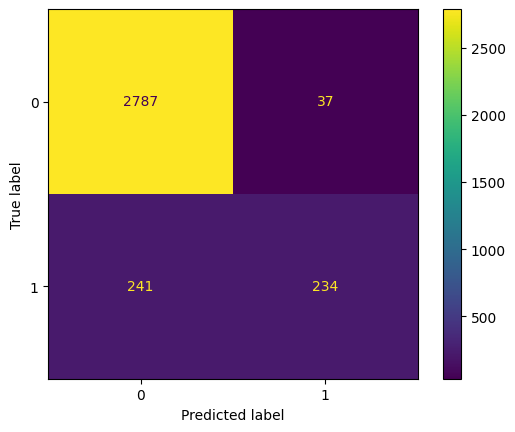

In [ ]:
cm = confusion_matrix(y_Train, predictions_n, labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(cm, display_labels=None)
disp.plot()

In [ ]:
acc_nn = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])

specif_nn = (cm[0,0])/(cm[0,0]+cm[0,1])

prec_nn = (cm[1,1])/(cm[1,1]+cm[0,1])

sens_nn = (cm[1,1])/(cm[1,1]+cm[1,0])

print("Accuracy=",acc_nn," Specificity=",specif_nn," Precision=",prec_nn," Sensitivity/Recall=",sens_nn)

Accuracy= 0.9157320400121249  Specificity= 0.9868980169971672  Precision= 0.8634686346863468  Sensitivity/Recall= 0.4926315789473684


In [ ]:
#Fit-Predict-Score: Training to training

predictions_val = MLPC_Train_fit.predict(X_Val_p) #Predict
score_val = MLPC.score(X_Val_p,y_Val) #Score

#Build R^2 value
print(score_val)

0.9192660550458716


The second *Confusion Matrix* gives us a solid idea of the performance of the NN on the validation set. How well did we learn? This is our opportunity to go back and review/relearn the material based on guided feedback.

Accuracy= 0.9157320400121249  Specificity= 0.997872340425532  Precision= 0.9696969696969697  Sensitivity/Recall= 0.4266666666666667


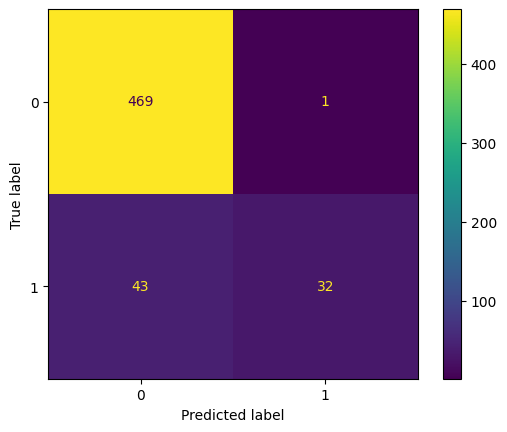

In [ ]:
cm_val = confusion_matrix(y_Val, predictions_val, labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(cm_val, display_labels=None)
disp.plot()

cm = cm_val

specif_nn = (cm[0,0])/(cm[0,0]+cm[0,1])

prec_nn = (cm[1,1])/(cm[1,1]+cm[0,1])

sens_nn = (cm[1,1])/(cm[1,1]+cm[1,0])

print("Accuracy=",acc_nn," Specificity=",specif_nn," Precision=",prec_nn," Sensitivity/Recall=",sens_nn)

### **DEPLOY**

It's finally exam day. Put up or shut up time. How will we perform?

In [ ]:
predictions_test = MLPC_Train_fit.predict(X_Test_p) #Predict
years_to_combine = [2011, 2023, 2024]
combined_Test = combine_nba_stats(years_to_combine)
combined_Test1 = combined_Test.copy()
combined_Test2 = combined_Test1.iloc[X_Test_p.index,:]
combined_Test2['All_Star_Pred']=predictions_test
combined_Test2['Name'] = combined_Test2['Player']

pd.set_option('display.max_rows', 100)
combined_Test2[combined_Test2['PER']>20]



<ipython-input-44-d91a402e3454>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-d91a402e3454>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Player,Age_trad,Team,Pos_trad,G_trad,GS_trad,MP_trad,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards_trad,Age_adv,Pos_adv,G_adv,GS_adv,MP_adv,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards_adv,Year,All_Star,All_Star_Pred,Name
0,Kevin Durant,22.0,OKC,SF,78.0,78.0,38.9,9.1,19.7,0.462,1.9,5.3,0.350,7.3,14.4,0.504,0.509,7.6,8.7,0.880,0.7,6.1,6.8,2.7,1.1,1.0,2.8,2.0,27.7,"MVP-5,AS,NBA1",22.0,SF,78.0,78.0,3038.0,23.6,0.589,0.269,0.439,2.3,17.7,10.3,13.2,1.5,1.8,10.6,30.6,8.6,3.3,12.0,0.189,5.2,-0.3,4.9,5.3,"MVP-5,AS,NBA1",2011,1,1,Kevin Durant
1,LeBron James,26.0,MIA,SF,79.0,79.0,38.8,9.6,18.8,0.510,1.2,3.5,0.330,8.4,15.3,0.552,0.541,6.4,8.4,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7,"MVP-3,DPOY-9,AS,NBA1",26.0,SF,79.0,79.0,3063.0,27.3,0.594,0.188,0.446,3.3,18.7,11.4,34.9,2.1,1.3,13.8,31.5,10.3,5.3,15.6,0.244,6.3,1.8,8.1,7.8,"MVP-3,DPOY-9,AS,NBA1",2011,1,1,LeBron James
2,Carmelo Anthony,26.0,2TM,SF,77.0,77.0,35.7,8.9,19.5,0.455,1.2,3.3,0.378,7.6,16.3,0.470,0.487,6.6,7.9,0.838,1.5,5.8,7.3,2.9,0.9,0.6,2.7,2.9,25.6,AS,26.0,SF,77.0,77.0,2751.0,21.7,0.557,0.167,0.403,5.0,18.3,11.8,14.7,1.2,1.3,10.4,32.0,5.4,2.5,7.9,0.138,3.2,-1.2,1.9,2.7,AS,2011,1,1,Carmelo Anthony
3,Carmelo Anthony,26.0,DEN,SF,50.0,50.0,35.5,8.7,19.3,0.452,0.8,2.5,0.333,7.9,16.8,0.470,0.474,6.9,8.3,0.823,1.5,6.1,7.6,2.8,0.9,0.6,2.8,2.7,25.2,NaN,26.0,SF,50.0,50.0,1774.0,21.2,0.547,0.130,0.431,5.2,19.3,12.4,14.3,1.2,1.3,11.0,32.5,2.8,1.9,4.7,0.127,2.4,-1.0,1.4,1.5,NaN,2011,0,1,Carmelo Anthony
5,Dwyane Wade,29.0,MIA,SG,76.0,76.0,37.1,9.1,18.2,0.500,0.8,2.7,0.306,8.3,15.5,0.534,0.523,6.5,8.6,0.758,1.6,4.8,6.4,4.6,1.5,1.1,3.1,2.6,25.5,"MVP-7,DPOY-16,AS,NBA2",29.0,SG,76.0,76.0,2823.0,25.6,0.581,0.149,0.471,5.5,14.4,10.2,23.5,2.1,2.4,12.4,31.6,8.1,4.7,12.8,0.218,5.5,1.1,6.6,6.1,"MVP-7,DPOY-16,AS,NBA2",2011,1,1,Dwyane Wade
6,Kobe Bryant,32.0,LAL,SG,82.0,82.0,33.9,9.0,20.0,0.451,1.4,4.3,0.323,7.6,15.6,0.487,0.487,5.9,7.1,0.828,1.0,4.1,5.1,4.7,1.2,0.1,3.0,2.1,25.3,"MVP-4,DPOY-11,AS,NBA1",32.0,SG,82.0,82.0,2779.0,23.9,0.548,0.217,0.356,3.5,13.3,8.5,26.7,1.9,0.3,11.4,35.1,6.8,3.5,10.3,0.178,5.4,-0.2,5.2,5.0,"MVP-4,DPOY-11,AS,NBA1",2011,1,1,Kobe Bryant
7,Amar'e Stoudemire,28.0,NYK,C,78.0,78.0,36.8,9.5,19.0,0.502,0.1,0.3,0.435,9.4,18.7,0.503,0.505,6.1,7.7,0.792,2.5,5.6,8.2,2.6,0.9,1.9,3.2,3.5,25.3,"MVP-9,AS,NBA2",28.0,C,78.0,78.0,2870.0,22.7,0.565,0.016,0.403,7.8,17.6,12.7,13.2,1.2,3.8,12.5,30.9,5.4,2.6,8.0,0.134,2.0,-0.6,1.4,2.4,"MVP-9,AS,NBA2",2011,1,1,Amar'e Stoudemire
8,Derrick Rose,22.0,CHI,PG,81.0,81.0,37.4,8.8,19.7,0.445,1.6,4.8,0.332,7.2,15.0,0.481,0.485,5.9,6.9,0.858,1.0,3.1,4.1,7.7,1.0,0.6,3.4,1.7,25.0,"MVP-1,AS,NBA1",22.0,PG,81.0,81.0,3026.0,23.5,0.550,0.241,0.348,3.2,9.4,6.4,38.7,1.5,1.3,13.1,32.2,8.3,4.8,13.1,0.208,6.3,0.5,6.8,6.7,"MVP-1,AS,NBA1",2011,1,1,Derrick Rose
10,Kevin Martin,27.0,HOU,SG,80.0,80.0,32.5,6.9,15.8,0.436,2.2,5.7,0.383,4.7,10.1,0.467,0.506,7.4,8.4,0.888,0.4,2.9,3.2,2.5,1.0,0.2,2.3,1.9,23.5,NaN,27.0,SG,80.0,80.0,2603.0,21.4,0.601,0.362,0.528,1.2,10.0,5.6,13.0,1.6,0.4,10.5,29.6,8.0,1.5,9.5,0.175,4.3,-1.0,3.4,3.5,NaN,2011,0,0,Kevin Martin
11,Dirk Nowitzki,32.0,DAL,PF,73.0,73.0,34.3,8.4,16.2,0.517,0.9,2.3,0.393,7.5,13.8,0.538,0.545,5.4,6.1,0.892,0.7,6.3,7.0,2.6,0.5,0.6,1.9,2.4,23.0,"MVP-6,AS,NBA2",32.0,PF,73.0,73.0,2504.0,23.4,0.612,0.142,0.376,2.4,20.8,12.0,14.2,0.8,1.4,9.1,28.2,7.8,3.3,11.1,0.213,4.3,0.8,5.1,4.5,"MVP-6,AS,NBA2",2011,1,1,Dirk Nowitzki


How do our predictions line up against the 2023 "[all snub team](https://andscape.com/features/the-2023-nba-all-snub-team/)"?

Accuracy= 0.9157320400121249  Specificity= 0.9780439121756487  Precision= 0.7555555555555555  Sensitivity/Recall= 0.4473684210526316


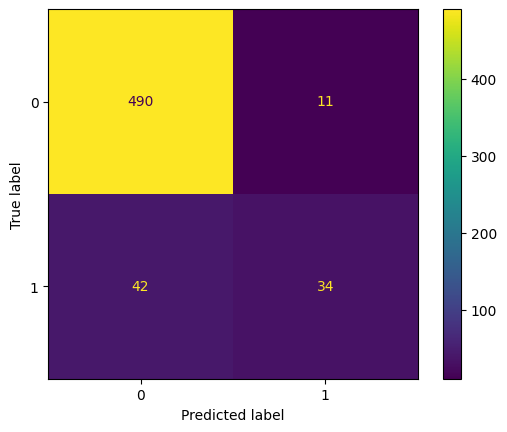

In [61]:
cm_test = confusion_matrix(y_Test, predictions_test, labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(cm_test, display_labels=None)
disp.plot()

cm = cm_test

specif_nn = (cm[0,0])/(cm[0,0]+cm[0,1])

prec_nn = (cm[1,1])/(cm[1,1]+cm[0,1])

sens_nn = (cm[1,1])/(cm[1,1]+cm[1,0])

print("Accuracy=",acc_nn," Specificity=",specif_nn," Precision=",prec_nn," Sensitivity/Recall=",sens_nn)

In summary let's visualize how distinguishable the two groups are based on two advancd metrics:

In [64]:
# prompt: use plotly express to sketch a graph of  the players in the combined_Test2 dataframe. Select two features you think will be able to discriminate well between all stars and non all stars. color the predicted all star group green and the non predicted group red

#import plotly.express as px

# Assuming combined_Test2 DataFrame is already available

fig = px.scatter(combined_Test2, x="PER", y="WS", color=combined_Test2['All_Star'].astype(str) ,
                 color_discrete_map={0: 'red', 1: 'green'},
                 hover_data=['Name'],
                 title="Actual All Stars: PER vs WS")
fig.show()


In [65]:
fig = px.scatter(combined_Test2, x="PER", y="WS", color=combined_Test2['All_Star_Pred'].astype(str) ,
                 color_discrete_map={0: 'red', 1: 'green'},
                 hover_data=['Name'],
                 title="Predicted All Stars: PER vs WS")
fig.show()

What differences do you notice between the scatterplots?

Finally let's locate where our wrong decisions live:

In [ ]:
combined_Test2['Correct'] = combined_Test2['All_Star'] == combined_Test2['All_Star_Pred']
combined_Test2.head()

<ipython-input-48-6c72ffa53003>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Player,Age_trad,Team,Pos_trad,G_trad,GS_trad,MP_trad,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards_trad,Age_adv,Pos_adv,G_adv,GS_adv,MP_adv,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards_adv,Year,All_Star,All_Star_Pred,Name,Correct
0,Kevin Durant,22.0,OKC,SF,78.0,78.0,38.9,9.1,19.7,0.462,1.9,5.3,0.350,7.3,14.4,0.504,0.509,7.6,8.7,0.880,0.7,6.1,6.8,2.7,1.1,1.0,2.8,2.0,27.7,"MVP-5,AS,NBA1",22.0,SF,78.0,78.0,3038.0,23.6,0.589,0.269,0.439,2.3,17.7,10.3,13.2,1.5,1.8,10.6,30.6,8.6,3.3,12.0,0.189,5.2,-0.3,4.9,5.3,"MVP-5,AS,NBA1",2011,1,1,Kevin Durant,True
1,LeBron James,26.0,MIA,SF,79.0,79.0,38.8,9.6,18.8,0.510,1.2,3.5,0.330,8.4,15.3,0.552,0.541,6.4,8.4,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7,"MVP-3,DPOY-9,AS,NBA1",26.0,SF,79.0,79.0,3063.0,27.3,0.594,0.188,0.446,3.3,18.7,11.4,34.9,2.1,1.3,13.8,31.5,10.3,5.3,15.6,0.244,6.3,1.8,8.1,7.8,"MVP-3,DPOY-9,AS,NBA1",2011,1,1,LeBron James,True
2,Carmelo Anthony,26.0,2TM,SF,77.0,77.0,35.7,8.9,19.5,0.455,1.2,3.3,0.378,7.6,16.3,0.470,0.487,6.6,7.9,0.838,1.5,5.8,7.3,2.9,0.9,0.6,2.7,2.9,25.6,AS,26.0,SF,77.0,77.0,2751.0,21.7,0.557,0.167,0.403,5.0,18.3,11.8,14.7,1.2,1.3,10.4,32.0,5.4,2.5,7.9,0.138,3.2,-1.2,1.9,2.7,AS,2011,1,1,Carmelo Anthony,True
3,Carmelo Anthony,26.0,DEN,SF,50.0,50.0,35.5,8.7,19.3,0.452,0.8,2.5,0.333,7.9,16.8,0.470,0.474,6.9,8.3,0.823,1.5,6.1,7.6,2.8,0.9,0.6,2.8,2.7,25.2,NaN,26.0,SF,50.0,50.0,1774.0,21.2,0.547,0.130,0.431,5.2,19.3,12.4,14.3,1.2,1.3,11.0,32.5,2.8,1.9,4.7,0.127,2.4,-1.0,1.4,1.5,NaN,2011,0,1,Carmelo Anthony,False
5,Dwyane Wade,29.0,MIA,SG,76.0,76.0,37.1,9.1,18.2,0.500,0.8,2.7,0.306,8.3,15.5,0.534,0.523,6.5,8.6,0.758,1.6,4.8,6.4,4.6,1.5,1.1,3.1,2.6,25.5,"MVP-7,DPOY-16,AS,NBA2",29.0,SG,76.0,76.0,2823.0,25.6,0.581,0.149,0.471,5.5,14.4,10.2,23.5,2.1,2.4,12.4,31.6,8.1,4.7,12.8,0.218,5.5,1.1,6.6,6.1,"MVP-7,DPOY-16,AS,NBA2",2011,1,1,Dwyane Wade,True


In [ ]:
fig = px.scatter(combined_Test2, x="PER", y="WS", color="Correct",
                 color_discrete_map={0: 'red', 1: 'green'},
                 hover_data=['Name'])
fig.show()

![](https://drive.google.com/uc?export=view&id=1aYERFAb4xvflkGcgUHcqWk_uMyrPK910)


![](https://drive.google.com/uc?export=view&id=1pPPc1DeD-X7Yk_ofW0_NkyjbnjtLZ6js)
